In [1]:
#### Load Data and Libraries ####
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/valentinpiparo/Desktop/Econometrics/Period 2/Computational Research Skills/ScanRecords.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Time,Duration,PatientType
0,2023-08-01,8.23,0.949176,Type 2
1,2023-08-01,8.49,0.479593,Type 1
2,2023-08-01,9.12,0.496112,Type 2
3,2023-08-01,10.26,0.691947,Type 2
4,2023-08-01,10.64,0.345412,Type 1


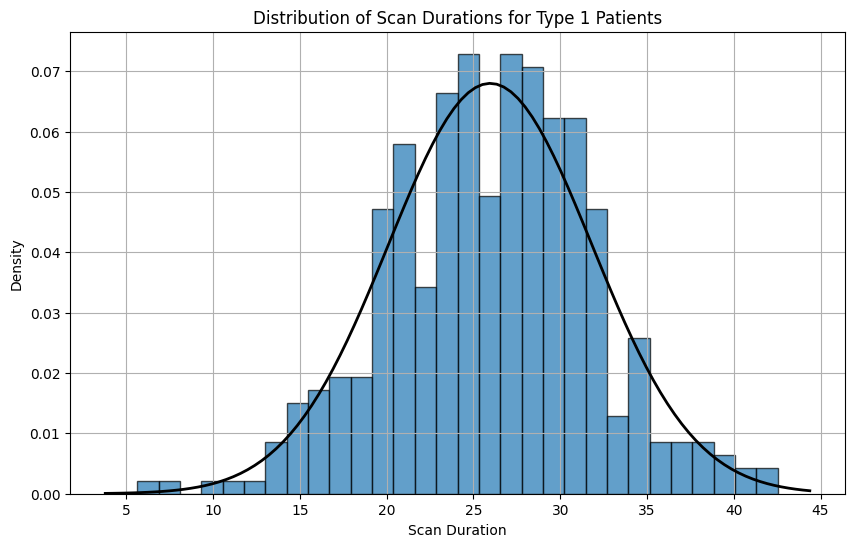

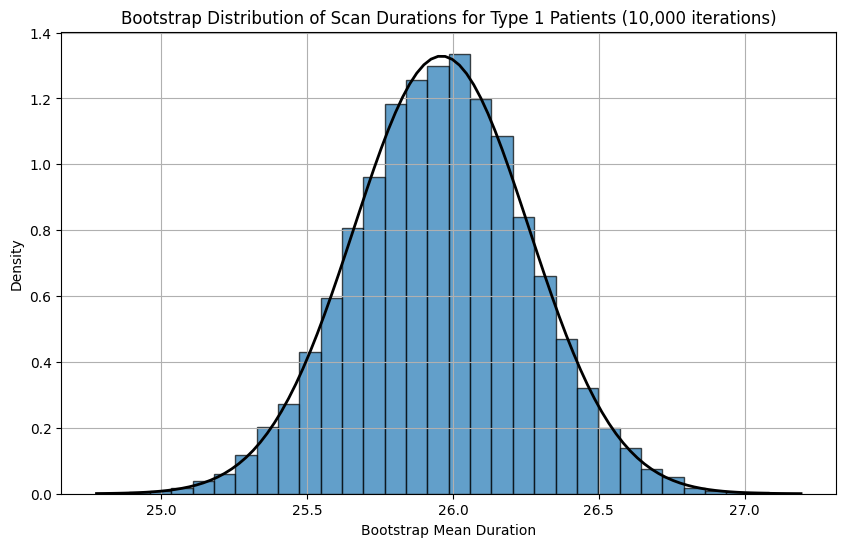

                                 Metric      Value
0                         Mean Duration  25.959648
1        Standard Deviation of Duration   5.866455
2                       Median Duration  26.153302
3          First Quartile (Q1) Duration  22.087370
4          Third Quartile (Q3) Duration  29.814433
5    Interquartile Range (IQR) Duration   7.727063
6  95% CI Lower Bound for Mean Duration  25.367136
7  95% CI Upper Bound for Mean Duration  26.552160
8               Bootstrap Mean Duration  25.960359
9              Bootstrap Standard Error   0.300241


In [2]:
#### Type 1 STATISTICAL ANALYSIS (DURATION) ####
# Filter data for Type 1 patients
type1_data = data[data['PatientType'] == 'Type 1'].copy()

# Convert Date column to datetime format
type1_data.loc[:, 'Date'] = pd.to_datetime(type1_data['Date'])

# Convert Duration from hours to minutes
type1_data.loc[:, 'Duration_Minutes'] = type1_data['Duration'] * 60

#### 1. Scan Duration Analysis ####
scan_durations = type1_data['Duration_Minutes']

# Descriptive Statistics
mean_duration = np.mean(scan_durations)
std_duration = np.std(scan_durations, ddof=1)
median_duration = np.median(scan_durations)
q1_duration, q3_duration = np.percentile(scan_durations, [25, 75])
iqr_duration = q3_duration - q1_duration

# 95% Confidence Interval for the Mean
confidence_level = 0.95
n = len(scan_durations)
sem_duration = stats.sem(scan_durations)
margin_of_error = sem_duration * stats.t.ppf((1 + confidence_level) / 2., n - 1)
ci_lower, ci_upper = mean_duration - margin_of_error, mean_duration + margin_of_error

# Plotting Original Scan Durations Distribution with Normal Curve
plt.figure(figsize=(10, 6))
plt.hist(scan_durations, bins=30, edgecolor='black', alpha=0.7, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_duration, std_duration)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of Scan Durations for Type 1 Patients')
plt.xlabel('Scan Duration')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Bootstrap Analysis with 10,000 iterations
bootstrap_means = []
n_iterations = 10000
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(scan_durations, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
bootstrap_means = np.array(bootstrap_means)
bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std_error = np.std(bootstrap_means)

# Plotting Bootstrap Means Distribution with Normal Curve
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, bootstrap_mean, bootstrap_std_error)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Bootstrap Distribution of Scan Durations for Type 1 Patients (10,000 iterations)')
plt.xlabel('Bootstrap Mean Duration')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#### Summary of Type 1 Analysis ####
summary_df = pd.DataFrame({
    "Metric": [
        "Mean Duration", 
        "Standard Deviation of Duration", 
        "Median Duration", 
        "First Quartile (Q1) Duration", 
        "Third Quartile (Q3) Duration", 
        "Interquartile Range (IQR) Duration",
        "95% CI Lower Bound for Mean Duration",
        "95% CI Upper Bound for Mean Duration",
        "Bootstrap Mean Duration",
        "Bootstrap Standard Error"
    ],
    "Value": [
        mean_duration,
        std_duration,
        median_duration,
        q1_duration,
        q3_duration,
        iqr_duration,
        ci_lower,
        ci_upper,
        bootstrap_mean,
        bootstrap_std_error
    ]
})

# Display the summary dataframe
print(summary_df)


Summary of Analysis Without Overnight Gaps:
                                           Metric     Value
0                         Mean Inter-Arrival Time  0.484367
1        Standard Deviation of Inter-Arrival Time  0.531478
2                  Variance of Inter-Arrival Time  0.282469
3                       Median Inter-Arrival Time  0.325000
4          First Quartile (Q1) Inter-Arrival Time  0.110000
5          Third Quartile (Q3) Inter-Arrival Time  0.660000
6    Interquartile Range (IQR) Inter-Arrival Time  0.550000
7  95% CI Lower Bound for Mean Inter-Arrival Time  0.430328
8  95% CI Upper Bound for Mean Inter-Arrival Time  0.538406

Summary of Bootstrap Analysis Without Overnight Gaps:
                                Metric     Value
0            Parametric Bootstrap Mean  0.484469
1        Parametric Bootstrap Variance  0.000631
2  Parametric Bootstrap Standard Error  0.025127


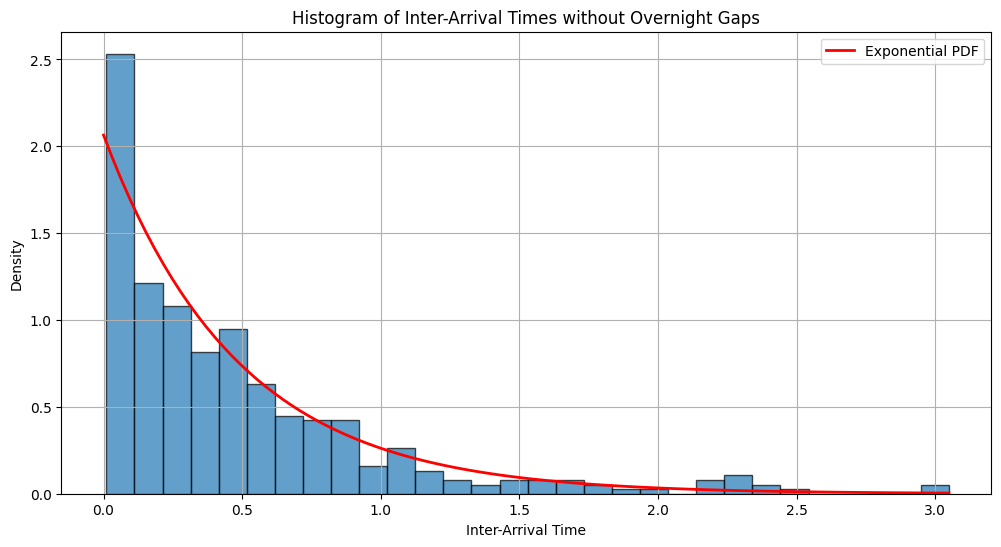

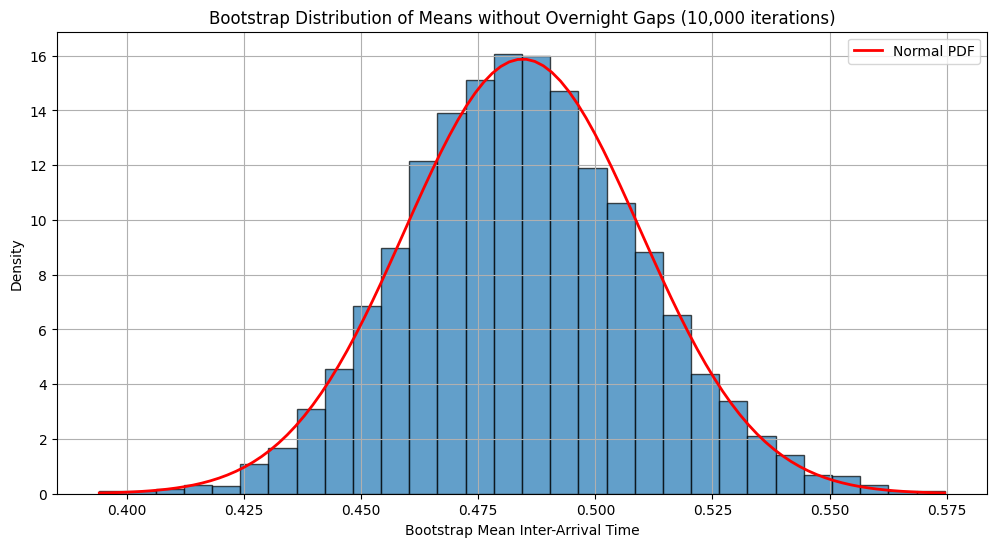

In [3]:
#### Type 1 STATISTICAL ANALYSIS (INTER-ARRIVAL) ####

# Filter data for Type 1 patients
type1_data = data[data['PatientType'] == 'Type 1'].copy()

# Convert Date column to datetime format
type1_data.loc[:, 'Date'] = pd.to_datetime(type1_data['Date'])

#### Method 1: Remove Overnight Gaps ####

# Removing overnight gaps and calculating inter-arrival times within the same day
type1_data_no_gaps = type1_data.copy()
type1_data_no_gaps.loc[:, 'InterArrivalTime'] = type1_data_no_gaps.groupby('Date')['Time'].diff().fillna(1/60)  # Calculate inter-arrival times within the same day (in hours)

# Remove any negative or zero inter-arrival times due to overnight gaps or other inconsistencies
type1_data_no_gaps = type1_data_no_gaps[type1_data_no_gaps['InterArrivalTime'] > 0]

# Descriptive Statistics without overnight gaps (in hours)
mean_inter_arrival_no_gaps = np.mean(type1_data_no_gaps['InterArrivalTime'])
std_inter_arrival_no_gaps = np.std(type1_data_no_gaps['InterArrivalTime'], ddof=1)
var_inter_arrival_no_gaps = np.var(type1_data_no_gaps['InterArrivalTime'], ddof=1)
median_inter_arrival_no_gaps = np.median(type1_data_no_gaps['InterArrivalTime'])
q1_inter_arrival_no_gaps, q3_inter_arrival_no_gaps = np.percentile(type1_data_no_gaps['InterArrivalTime'], [25, 75])
iqr_inter_arrival_no_gaps = q3_inter_arrival_no_gaps - q1_inter_arrival_no_gaps

# Confidence Interval for Mean (95%) (in hours)
n_no_gaps = len(type1_data_no_gaps['InterArrivalTime'])
confidence_level = 0.95
sem_inter_arrival_no_gaps = stats.sem(type1_data_no_gaps['InterArrivalTime'])
margin_of_error_no_gaps = sem_inter_arrival_no_gaps * stats.t.ppf((1 + confidence_level) / 2., n_no_gaps - 1)
ci_lower_no_gaps, ci_upper_no_gaps = mean_inter_arrival_no_gaps - margin_of_error_no_gaps, mean_inter_arrival_no_gaps + margin_of_error_no_gaps

#### Summary of Analysis Without Overnight Gaps ####

# Summary of Analysis Without Overnight Gaps
summary_no_gaps_df = pd.DataFrame({
    "Metric": [
        "Mean Inter-Arrival Time", 
        "Standard Deviation of Inter-Arrival Time", 
        "Variance of Inter-Arrival Time",
        "Median Inter-Arrival Time", 
        "First Quartile (Q1) Inter-Arrival Time", 
        "Third Quartile (Q3) Inter-Arrival Time", 
        "Interquartile Range (IQR) Inter-Arrival Time",
        "95% CI Lower Bound for Mean Inter-Arrival Time",
        "95% CI Upper Bound for Mean Inter-Arrival Time"
    ],
    "Value": [
        mean_inter_arrival_no_gaps,
        std_inter_arrival_no_gaps,
        var_inter_arrival_no_gaps,
        median_inter_arrival_no_gaps,
        q1_inter_arrival_no_gaps,
        q3_inter_arrival_no_gaps,
        iqr_inter_arrival_no_gaps,
        ci_lower_no_gaps,
        ci_upper_no_gaps
    ]
})

# Display the summary
print("Summary of Analysis Without Overnight Gaps:")
print(summary_no_gaps_df)

#### Parametric Bootstrap for Analysis Without Overnight Gaps ####

n_iterations = 10000

# Bootstrap Analysis Without Overnight Gaps
param_bootstrap_means_no_gaps = [
    np.mean(np.random.exponential(scale=mean_inter_arrival_no_gaps, size=len(type1_data_no_gaps)))
    for _ in range(n_iterations)
]
param_bootstrap_means_no_gaps = np.array(param_bootstrap_means_no_gaps)

# Summary of Bootstrap Analysis
bootstrap_summary_df = pd.DataFrame({
    "Metric": [
        "Parametric Bootstrap Mean",
        "Parametric Bootstrap Variance",
        "Parametric Bootstrap Standard Error"
    ],
    "Value": [
        np.mean(param_bootstrap_means_no_gaps),
        np.var(param_bootstrap_means_no_gaps, ddof=1),
        np.std(param_bootstrap_means_no_gaps, ddof=1)
    ]
})

# Display the bootstrap summary
print("\nSummary of Bootstrap Analysis Without Overnight Gaps:")
print(bootstrap_summary_df)

#### Plotting the Graphs ####

# Plot 1: Histogram of Inter-Arrival Times without Overnight Gaps with Exponential PDF
plt.figure(figsize=(12, 6))
plt.hist(type1_data_no_gaps['InterArrivalTime'], bins=30, edgecolor='k', alpha=0.7, density=True)
plt.title('Histogram of Inter-Arrival Times without Overnight Gaps')
plt.xlabel('Inter-Arrival Time')
plt.ylabel('Density')
plt.grid(True)

# Exponential PDF
lambda_estimate = 1 / mean_inter_arrival_no_gaps
x_vals = np.linspace(0, type1_data_no_gaps['InterArrivalTime'].max(), 100)
pdf_vals = lambda_estimate * np.exp(-lambda_estimate * x_vals)
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='Exponential PDF')
plt.legend()
plt.show()

# Plot 2: Bootstrap Distribution of Means without Overnight Gaps with Normal PDF
plt.figure(figsize=(12, 6))
plt.hist(param_bootstrap_means_no_gaps, bins=30, edgecolor='k', alpha=0.7, density=True)
plt.title('Bootstrap Distribution of Means without Overnight Gaps (10,000 iterations)')
plt.xlabel('Bootstrap Mean Inter-Arrival Time')
plt.ylabel('Density')
plt.grid(True)

# Normal PDF
mean_bootstrap = np.mean(param_bootstrap_means_no_gaps)
std_bootstrap = np.std(param_bootstrap_means_no_gaps, ddof=1)
x_vals = np.linspace(param_bootstrap_means_no_gaps.min(), param_bootstrap_means_no_gaps.max(), 100)
pdf_vals = stats.norm.pdf(x_vals, mean_bootstrap, std_bootstrap)
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='Normal PDF')
plt.legend()
plt.show()


Non-Parametric Bootstrap Summary for Type II Patients' Scan Duration:
Bootstrap Mean: 0.669309387370809
Bootstrap Standard Error: 0.01204045821575593
95% CI for Mean: [0.6453500123430869, 0.6926364378647555]


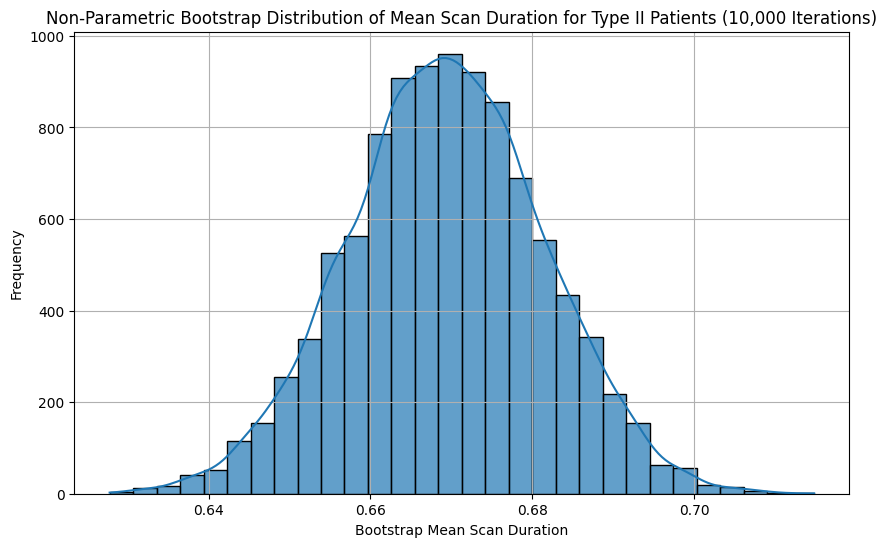

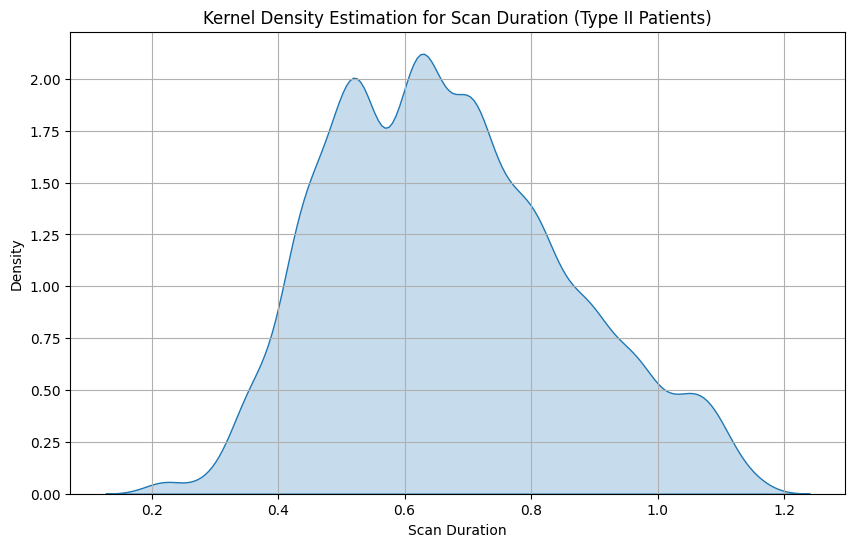

KDE Summary for Scan Duration (Type II Patients):
Mean: 0.669338869022397
Standard Deviation: 0.18689364052045973
Variance: 0.034929232866990824


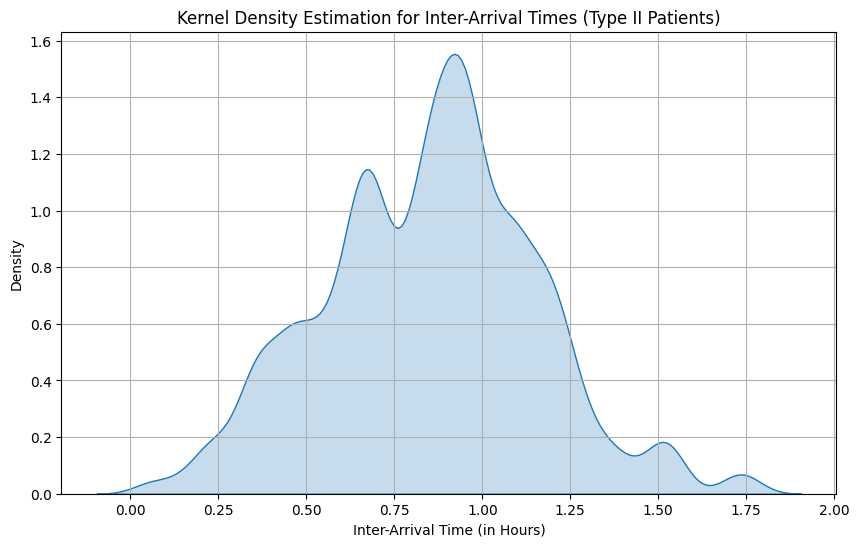

KDE Summary for Inter-Arrival Times (Type II Patients):
Mean: 0.8515277777777778
Standard Deviation: 0.30425528262656815
Variance: 0.09257127700617288
Non-Parametric Bootstrap Summary for Type II Patients' Inter-Arrival Times:
Bootstrap Mean: 0.8515155481171549
Bootstrap Standard Error: 0.01976046801430065
95% CI for Mean: [0.8125512552301254, 0.8901255230125523]


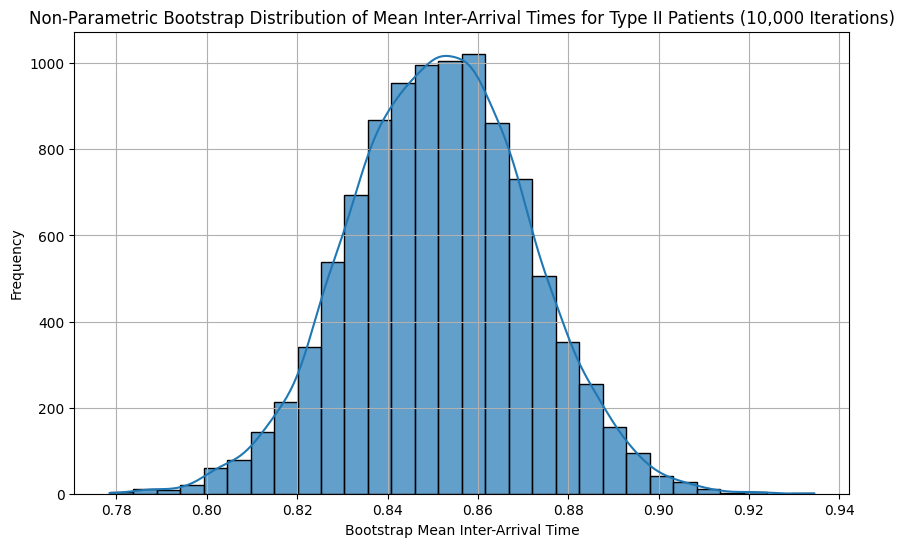


Summary Statistics for Initial Sample (Type II Patients' Scan Duration):
count    216.000000
mean       0.669608
std        0.183929
min        0.220708
25%        0.524975
50%        0.646517
75%        0.790188
max        1.146789
Name: Duration, dtype: float64
Scan Duration Skewness: 0.39917084464122693
Scan Duration Kurtosis: 2.659961929431726
Inter-Arrival Time Skewness: 0.06813260643313733
Inter-Arrival Time Kurtosis: 3.005761154826123


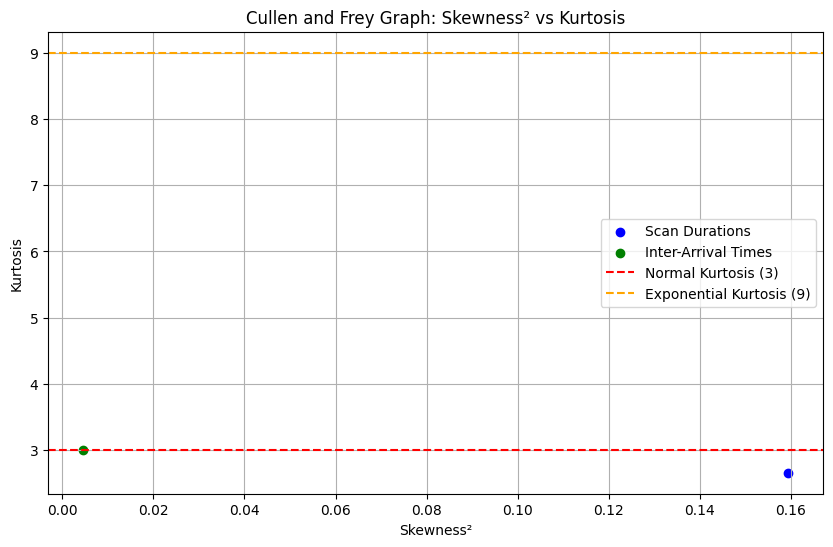

Best Fit for Scan Durations:
{'Distribution': 'Beta', 'Log-Likelihood': 64.21765550657625, 'Parameters': (6.077147040882037, 14.419014453252954, 0.12009582107613434, 1.8537080192664144)}
{'Distribution': 'Gamma', 'Log-Likelihood': 63.9069822886761, 'Parameters': (14.767504836992813, -0.03816482525493267, 0.04792771454159874)}
{'Distribution': 'Lognormal', 'Log-Likelihood': 63.73591085145347, 'Parameters': (0.17857601359456995, -0.35533822086627365, 1.0087669338116239)}
{'Distribution': 'Normal', 'Log-Likelihood': 59.743110958523964, 'Parameters': (0.6696080127120552, 0.18350249591479584)}
{'Distribution': 'Uniform', 'Log-Likelihood': 16.58737516091271, 'Parameters': (0.220707728518188, 0.926081158949402)}
{'Distribution': 'Exponential', 'Log-Likelihood': -42.993827977326056, 'Parameters': (0.220707728518188, 0.4489002841938672)}
{'Distribution': 'Weibull', 'Log-Likelihood': -inf, 'Parameters': (2.3014395398547647, 0.27916305514824835, 0.4429693744067592)}

Best Fit for Inter-Arrival Ti

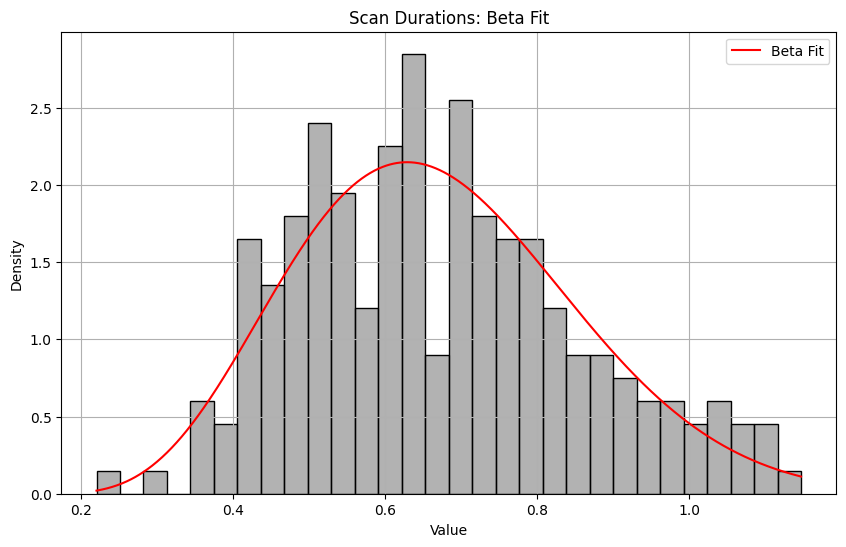

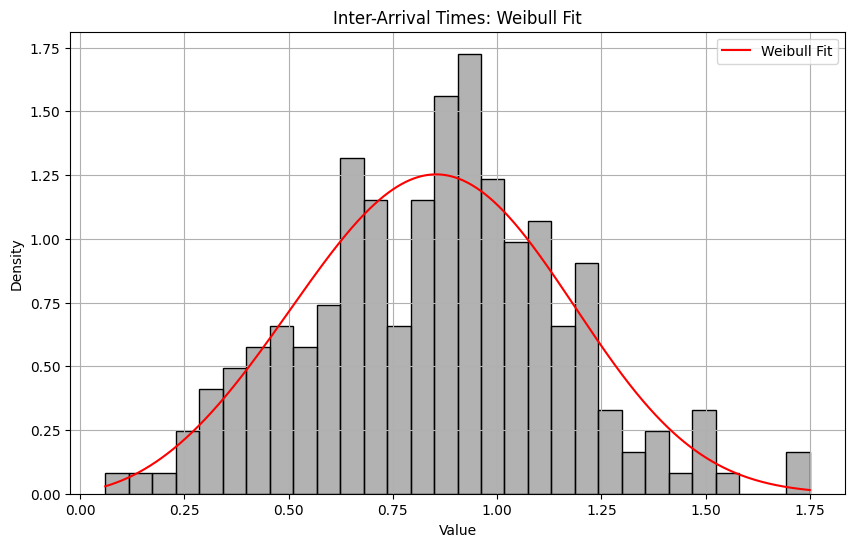


Best Fit for Scan Durations:
Distribution: Beta
Parameters: (6.077147040882037, 14.419014453252954, 0.12009582107613434, 1.8537080192664144)
Alpha (Shape 1): 6.077147040882037, Beta (Shape 2): 14.419014453252954

Best Fit for Inter-Arrival Times:
Distribution: Weibull
Parameters: (3.366231868366532, -0.08173207236610455, 1.0385716357561154)
This distribution does not have alpha and beta parameters.


In [5]:
import numpy as np

#### Type 2 STATISTICAL ANALYSIS ####
# Filter data for Type II patients
type2_data = data[data['PatientType'] == 'Type 2'].copy()

# Convert Date column to datetime format
type2_data['Date'] = pd.to_datetime(type2_data['Date'])

# Define parameters for bootstrap
n_iterations = 10000
n_samples = len(type2_data['Duration'])

# Bootstrap for Scan Durations
bootstrap_means = []
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(type2_data['Duration'], size=n_samples, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert bootstrap results to numpy array
bootstrap_means = np.array(bootstrap_means)

# Calculate statistics from bootstrap
bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std_error = np.std(bootstrap_means, ddof=1)
bootstrap_ci_lower = np.percentile(bootstrap_means, 2.5)
bootstrap_ci_upper = np.percentile(bootstrap_means, 97.5)

# Display bootstrap summary
print("Non-Parametric Bootstrap Summary for Type II Patients' Scan Duration:")
print(f"Bootstrap Mean: {bootstrap_mean}")
print(f"Bootstrap Standard Error: {bootstrap_std_error}")
print(f"95% CI for Mean: [{bootstrap_ci_lower}, {bootstrap_ci_upper}]")

# Plot Bootstrap Means Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.title('Non-Parametric Bootstrap Distribution of Mean Scan Duration for Type II Patients (10,000 Iterations)')
plt.xlabel('Bootstrap Mean Scan Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Kernel Density Estimation for Scan Duration
plt.figure(figsize=(10, 6))
sns.kdeplot(type2_data['Duration'], bw_adjust=0.5, fill=True)
plt.title('Kernel Density Estimation for Scan Duration (Type II Patients)')
plt.xlabel('Scan Duration')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# KDE Summary for Scan Duration
kde_scan_duration = stats.gaussian_kde(type2_data['Duration'])
kde_scan_duration_mean = kde_scan_duration.dataset.mean()
kde_scan_duration_std = kde_scan_duration.dataset.std()
kde_scan_duration_var = kde_scan_duration.dataset.var()
print("KDE Summary for Scan Duration (Type II Patients):")
print(f"Mean: {kde_scan_duration_mean}")
print(f"Standard Deviation: {kde_scan_duration_std}")
print(f"Variance: {kde_scan_duration_var}")

# Assuming 'Time' column exists and is used to calculate inter-arrival times
type2_data = type2_data.sort_values(by=['Date', 'Time'])

# Calculate inter-arrival times (ignoring overnight gaps)
type2_data['InterArrivalTime'] = type2_data['Time'].diff().fillna(0)
type2_data = type2_data[type2_data['InterArrivalTime'] > 0]  # Remove non-positive values

# KDE for Inter-Arrival Times
plt.figure(figsize=(10, 6))
sns.kdeplot(type2_data['InterArrivalTime'], bw_adjust=0.5, fill=True)
plt.title('Kernel Density Estimation for Inter-Arrival Times (Type II Patients)')
plt.xlabel('Inter-Arrival Time (in Hours)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# KDE Summary for Inter-Arrival Times
kde_inter_arrival = stats.gaussian_kde(type2_data['InterArrivalTime'])
kde_inter_arrival_mean = kde_inter_arrival.dataset.mean()
kde_inter_arrival_std = kde_inter_arrival.dataset.std()
kde_inter_arrival_var = kde_inter_arrival.dataset.var()
print("KDE Summary for Inter-Arrival Times (Type II Patients):")
print(f"Mean: {kde_inter_arrival_mean}")
print(f"Standard Deviation: {kde_inter_arrival_std}")
print(f"Variance: {kde_inter_arrival_var}")

# Bootstrap for Inter-Arrival Times
bootstrap_interarrival_means = []
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(type2_data['InterArrivalTime'], size=n_samples, replace=True)
    bootstrap_interarrival_means.append(np.mean(bootstrap_sample))

# Convert bootstrap results to numpy array
bootstrap_interarrival_means = np.array(bootstrap_interarrival_means)

# Calculate statistics from bootstrap
bootstrap_mean_interarrival = np.mean(bootstrap_interarrival_means)
bootstrap_std_error_interarrival = np.std(bootstrap_interarrival_means, ddof=1)
bootstrap_ci_lower_interarrival = np.percentile(bootstrap_interarrival_means, 2.5)
bootstrap_ci_upper_interarrival = np.percentile(bootstrap_interarrival_means, 97.5)

# Display bootstrap summary for inter-arrival times
print("Non-Parametric Bootstrap Summary for Type II Patients' Inter-Arrival Times:")
print(f"Bootstrap Mean: {bootstrap_mean_interarrival}")
print(f"Bootstrap Standard Error: {bootstrap_std_error_interarrival}")
print(f"95% CI for Mean: [{bootstrap_ci_lower_interarrival}, {bootstrap_ci_upper_interarrival}]")

# Plot Bootstrap Means Distribution for Inter-Arrival Times
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_interarrival_means, bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.title('Non-Parametric Bootstrap Distribution of Mean Inter-Arrival Times for Type II Patients (10,000 Iterations)')
plt.xlabel('Bootstrap Mean Inter-Arrival Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics for the initial sample
initial_sample_summary = type2_data['Duration'].describe()
print("\nSummary Statistics for Initial Sample (Type II Patients' Scan Duration):")
print(initial_sample_summary)



from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Calculate skewness and kurtosis for durations
duration_skewness = skew(type2_data['Duration'])
duration_kurtosis = kurtosis(type2_data['Duration'], fisher=False)  # Fisher=False gives Pearson kurtosis

# Calculate skewness and kurtosis for inter-arrival times
interarrival_skewness = skew(type2_data['InterArrivalTime'])
interarrival_kurtosis = kurtosis(type2_data['InterArrivalTime'], fisher=False)

# Print skewness and kurtosis values
print(f"Scan Duration Skewness: {duration_skewness}")
print(f"Scan Duration Kurtosis: {duration_kurtosis}")
print(f"Inter-Arrival Time Skewness: {interarrival_skewness}")
print(f"Inter-Arrival Time Kurtosis: {interarrival_kurtosis}")

# Generate the Cullen and Frey graph
plt.figure(figsize=(10, 6))

# Cullen and Frey points for scan durations
plt.scatter(duration_skewness**2, duration_kurtosis, label='Scan Durations', color='blue')

# Cullen and Frey points for inter-arrival times
plt.scatter(interarrival_skewness**2, interarrival_kurtosis, label='Inter-Arrival Times', color='green')

# Add reference lines for theoretical distributions (approximation)
plt.axhline(y=3, color='red', linestyle='--', label='Normal Kurtosis (3)')
plt.axhline(y=9, color='orange', linestyle='--', label='Exponential Kurtosis (9)')

# Add labels and legend
plt.title("Cullen and Frey Graph: Skewness² vs Kurtosis")
plt.xlabel("Skewness²")
plt.ylabel("Kurtosis")
plt.legend()
plt.grid(True)
plt.show()




import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon, gamma, lognorm, weibull_min, beta, uniform

def fit_distribution(data, dist, dist_name):
    """
    Fit a distribution to the data and calculate the log-likelihood.
    """
    try:
        params = dist.fit(data)
        log_likelihood = np.sum(dist.logpdf(data, *params))
        return {"Distribution": dist_name, "Log-Likelihood": log_likelihood, "Parameters": params}
    except Exception as e:
        return {"Distribution": dist_name, "Log-Likelihood": float('-inf'), "Parameters": None, "Error": str(e)}

# Expanded list of candidate distributions
candidate_distributions = [
    {"dist": norm, "name": "Normal"},
    {"dist": expon, "name": "Exponential"},
    {"dist": gamma, "name": "Gamma"},
    {"dist": lognorm, "name": "Lognormal"},
    {"dist": weibull_min, "name": "Weibull"},
    {"dist": beta, "name": "Beta"},
    {"dist": uniform, "name": "Uniform"}
]

# Function to evaluate all distributions for a dataset
def evaluate_distributions(data, candidate_distributions):
    results = []
    for candidate in candidate_distributions:
        results.append(fit_distribution(data, candidate["dist"], candidate["name"]))
    return sorted(results, key=lambda x: x['Log-Likelihood'], reverse=True)

# Evaluate distributions for Scan Durations
duration_results = evaluate_distributions(type2_data['Duration'], candidate_distributions)

# Evaluate distributions for Inter-Arrival Times
interarrival_results = evaluate_distributions(type2_data['InterArrivalTime'], candidate_distributions)

# Display the results
print("Best Fit for Scan Durations:")
for result in duration_results:
    print(result)

print("\nBest Fit for Inter-Arrival Times:")
for result in interarrival_results:
    print(result)

def plot_best_fit(data, results, title):
    """
    Plot histogram of the data with the PDF of the best-fitting distribution.
    """
    best_fit = results[0]
    if best_fit["Parameters"]:
        dist_name = best_fit["Distribution"]
        params = best_fit["Parameters"]
        
        # Map distribution name to actual scipy.stats distribution
        dist_map = {
            "Normal": norm,
            "Exponential": expon,
            "Gamma": gamma,
            "Lognormal": lognorm,
            "Weibull": weibull_min,
            "Beta": beta,
            "Uniform": uniform
        }
        dist = dist_map[dist_name]
        
        # Generate PDF for the best fit
        x = np.linspace(data.min(), data.max(), 1000)
        pdf = dist.pdf(x, *params)
        
        # Plot histogram and PDF
        plt.figure(figsize=(10, 6))
        sns.histplot(data, bins=30, kde=False, stat='density', alpha=0.6, color='gray', edgecolor='black')
        plt.plot(x, pdf, label=f"{dist_name} Fit", color="red")
        plt.title(f"{title}: {dist_name} Fit")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Could not fit {best_fit['Distribution']}.")

# Plot best fit for Scan Durations
plot_best_fit(type2_data['Duration'], duration_results, "Scan Durations")

# Plot best fit for Inter-Arrival Times
plot_best_fit(type2_data['InterArrivalTime'], interarrival_results, "Inter-Arrival Times")

# Extract and display alpha and beta for Inter-Arrival Times and Scan Durations
def extract_alpha_beta(results, title):
    best_fit = results[0]  # Get the best-fitting distribution
    if best_fit["Parameters"]:
        dist_name = best_fit["Distribution"]
        params = best_fit["Parameters"]
        
        print(f"\nBest Fit for {title}:")
        print(f"Distribution: {dist_name}")
        print(f"Parameters: {params}")
        
        if dist_name in ["Gamma", "Beta"]:
            # Gamma and Beta distributions have alpha and beta
            if dist_name == "Gamma":
                alpha, loc, beta = params
                print(f"Alpha (Shape): {alpha}, Beta (Scale): {beta}")
            elif dist_name == "Beta":
                alpha, beta, loc, scale = params
                print(f"Alpha (Shape 1): {alpha}, Beta (Shape 2): {beta}")
        else:
            print("This distribution does not have alpha and beta parameters.")
    else:
        print(f"Could not fit a distribution to {title}.")

# Display alpha and beta for Scan Durations
extract_alpha_beta(duration_results, "Scan Durations")

# Display alpha and beta for Inter-Arrival Times
extract_alpha_beta(interarrival_results, "Inter-Arrival Times")
